In [1]:
%matplotlib notebook

In [5]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
# Load in csv
pyber_ridedata_df = pd.read_csv("./raw_data/ride_data.csv")
pyber_citydata_df = pd.read_csv("./raw_data/city_data.csv")

# merge the 2 DFs with key as city

pyber_merge_df = pd.merge(pyber_ridedata_df,pyber_citydata_df,left_on="city",right_on="city")

# Create DFs for each of the city type for charting purposes

pyber_ridedata_urban_df = pyber_merge_df[pyber_merge_df["type"] == "Urban"]
pyber_ridedata_suburban_df = pyber_merge_df[pyber_merge_df["type"] == "Suburban"]
pyber_ridedata_rural_df = pyber_merge_df[pyber_merge_df["type"] == "Rural"]  

pyber_citydata_urban_df = pyber_citydata_df[pyber_citydata_df["type"] == "Urban"]
pyber_citydata_suburban_df = pyber_citydata_df[pyber_citydata_df["type"] == "Suburban"]
pyber_citydata_rural_df = pyber_citydata_df[pyber_citydata_df["type"] == "Rural"]


<IPython.core.display.Javascript object>


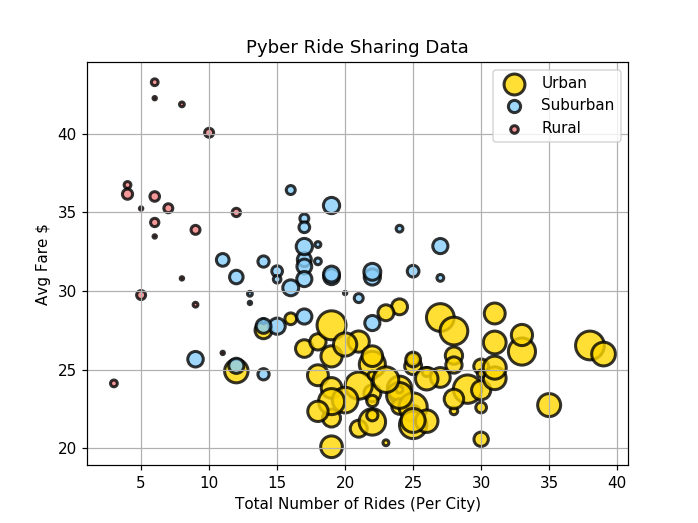

In [16]:
# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Since there are 4 variables, it is best to do 3 scatter plots by city type
plt.scatter(pyber_ridedata_urban_df.groupby(["city"]).count()["date"], pyber_ridedata_urban_df.groupby(["city"]).mean()["fare"],s=pyber_citydata_urban_df["driver_count"]*5,c="gold",label="Urban",alpha=0.8,edgecolor="black",linewidth=2)
plt.scatter(pyber_ridedata_suburban_df.groupby(["city"]).count()["date"], pyber_ridedata_suburban_df.groupby(["city"]).mean()["fare"],s=pyber_citydata_suburban_df["driver_count"]*5,c="lightskyblue",label="Suburban",alpha=0.8,edgecolor="black",linewidth=2)
plt.scatter(pyber_ridedata_rural_df.groupby(["city"]).count()["date"], pyber_ridedata_rural_df.groupby(["city"]).mean()["fare"],s=pyber_citydata_rural_df["driver_count"]*5,c="lightcoral",label="Rural",alpha=0.8,edgecolor="black",linewidth=2)

# Set a Title and labels
plt.grid()
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avg Fare $")
plt.legend()

In [17]:
# Tells matplotlib that we want a pie chart with equal axes
#plt.axis("equal")

In [18]:
# Calculate total rides by city type here for piechart

explode = (0.1, 0, 0)
labels = ["Urban","Suburban","Rural"]
urban_ride_count = pyber_ridedata_urban_df["ride_id"].count()
suburban_ride_count = pyber_ridedata_suburban_df["ride_id"].count()
rural_ride_count = pyber_ridedata_rural_df["ride_id"].count()

ride_count = [urban_ride_count, suburban_ride_count, rural_ride_count]


<IPython.core.display.Javascript object>


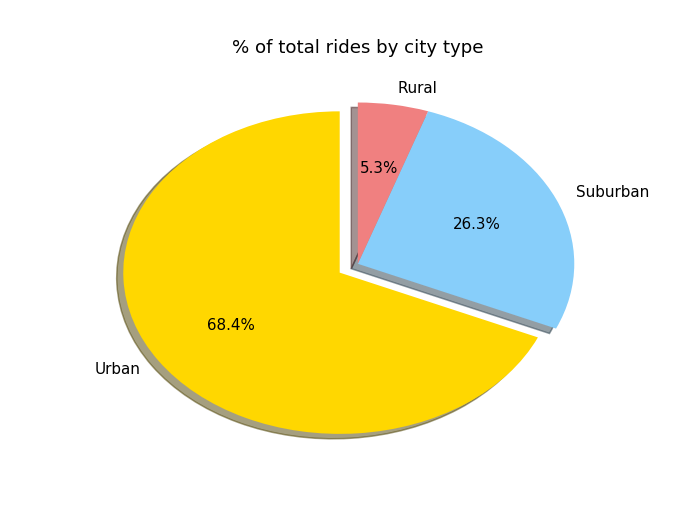

([<matplotlib.patches.Wedge at 0xc0ac2b0>,
 [Text(-1.0046,-0.656338,'Urban'),
  Text(1.00735,0.441865,'Suburban'),
  Text(0.181054,1.085,'Rural')],
 [Text(-0.586017,-0.382864,'68.4%'),
  Text(0.549464,0.241017,'26.3%'),
  Text(0.0987567,0.591817,'5.3%')])

In [19]:
plt.title("% of total rides by city type")
plt.pie(ride_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)


In [20]:
# Calculate total fares by city type here for piechart
urban_fare_count = pyber_ridedata_urban_df["fare"].sum()
suburban_fare_count = pyber_ridedata_suburban_df["fare"].sum()
rural_fare_count = pyber_ridedata_rural_df["fare"].sum()
    
fare_count = [urban_fare_count, suburban_fare_count, rural_fare_count]


<IPython.core.display.Javascript object>


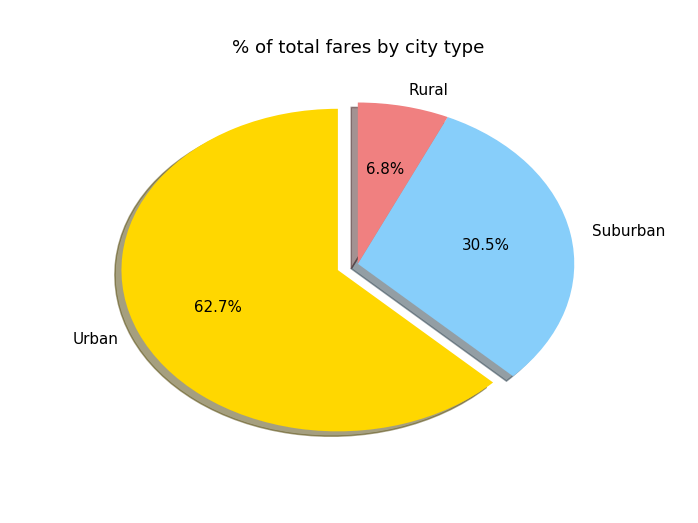

([<matplotlib.patches.Wedge at 0xc2c7080>,
 [Text(-1.10539,-0.467032,'Urban'),
  Text(1.08107,0.20317,'Suburban'),
  Text(0.233596,1.07491,'Rural')],
 [Text(-0.644809,-0.272436,'62.7%'),
  Text(0.589677,0.11082,'30.5%'),
  Text(0.127416,0.586315,'6.8%')])

In [21]:
plt.title("% of total fares by city type")
plt.pie(fare_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)


In [22]:
# Calculate total drivers by city type here for piechart
urban_driver_count = pyber_ridedata_urban_df["driver_count"].unique().sum()
suburban_driver_count = pyber_ridedata_suburban_df["driver_count"].unique().sum()
rural_driver_count = pyber_ridedata_rural_df["driver_count"].unique().sum()
    
driver_count = [urban_driver_count, suburban_driver_count, rural_driver_count]

<IPython.core.display.Javascript object>


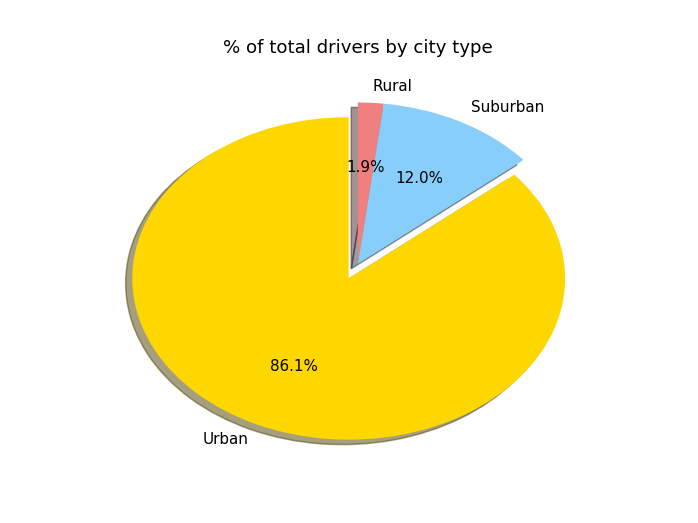

([<matplotlib.patches.Wedge at 0xc3620b8>,
 [Text(-0.506603,-1.08782,'Urban'),
  Text(0.523295,0.967555,'Suburban'),
  Text(0.0659031,1.09802,'Rural')],
 [Text(-0.295519,-0.634562,'86.1%'),
  Text(0.285433,0.527757,'12.0%'),
  Text(0.0359472,0.598922,'1.9%')])

In [23]:
plt.title("% of total drivers by city type")
plt.pie(driver_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

In [ ]:
#Observable trends based on data
# People take more rides in urban areas compared to rural areas
# People pay more for a ride on average in rural areas compared to urban areas
# number of drivers in urban areas far exceed the number of drivers in rural areas